In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

In [4]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint

In [5]:
import pandas as pd
import numpy as np
import gc

import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pytorch_lightning as pl
import torch.nn.functional as F
from pytorch_lightning.callbacks import Callback
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, TensorDataset, Subset
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint

In [6]:
%matplotlib inline  

In [7]:
torch.cuda.is_available()

True

In [8]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    not_device = torch.device('cpu')
else:
    device = torch.device('cpu')
    not_device = torch.device('cuda')

In [45]:
# load the data
trainPwd = './MATH5470/train.csv'
train_df = pd.read_csv(trainPwd)
train_df.head()

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1,0,1,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,...,0.366028,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566
1,0_2,0,2,-0.231040,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,...,-0.154193,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624
2,0_6,0,6,0.568807,0.393974,0.615937,0.567806,-0.607963,0.068883,-1.083155,...,-0.138020,0.912726,-0.551904,-1.220772,-1.060166,-0.219097,-1.087009,-0.612428,-0.113944,0.243608
3,0_7,0,7,-1.064780,-2.343535,-0.011870,1.874606,-0.606346,-0.586827,-0.815737,...,0.382201,0.912726,-0.266359,-1.220772,0.941183,-0.609113,0.104928,-0.783423,1.151730,-0.773309
4,0_8,0,8,-0.531940,0.842057,-0.262993,2.330030,-0.583422,-0.618392,-0.742814,...,-0.170365,0.912726,-0.741355,-1.220772,0.941183,-0.588445,0.104928,0.753279,1.345611,-0.737624


In [46]:
train_df.shape

(3141410, 304)

In [10]:
indexPwd = './MATH5470/validation_indexes.csv'
validate_df = pd.read_csv(indexPwd)
validate_df.head()
newValidateArray = validate_df['Index'].values
newTrainArray = np.setdiff1d(np.arange(0, train_df.shape[0]), newValidateArray)
validateDf = train_df.iloc[newValidateArray]
train_df = train_df.iloc[newTrainArray]

In [11]:
train = train_df
float_feature_names = train.drop(['target', 'row_id', 'time_id', 'investment_id'], axis=1).columns
float_input = train[float_feature_names].values
investment_id = train[['investment_id']].values.astype(int)
time_id = train[['time_id']].values.astype(int)
targets = train[['target']].values

del train


In [12]:
allTarget = train_df['target'].values
positiveTarget = allTarget[allTarget>0]
negativeTarget = allTarget[allTarget<0]

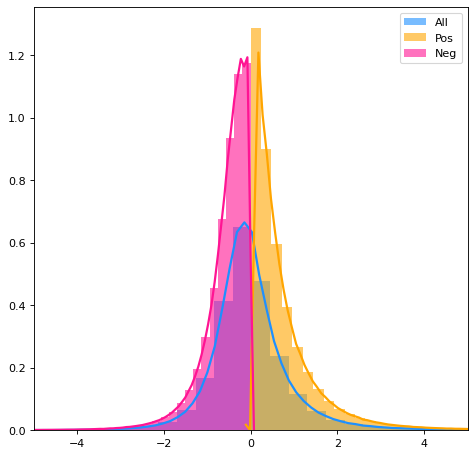

In [13]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(7,7), dpi= 80)
sns.distplot(allTarget, color="dodgerblue", label="All", **kwargs)
sns.distplot(positiveTarget, color="orange", label="Pos", **kwargs)
sns.distplot(negativeTarget, color="deeppink", label="Neg", **kwargs)
plt.xlim(-5,5)
plt.legend()

In [14]:
import umap
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [15]:
reducer = umap.UMAP()

In [16]:
featureDf = train_df[['f_' + str(i) for i in range(300)]]

In [17]:
scaled_featureDf = StandardScaler().fit_transform(featureDf.values)

In [18]:
embedding = reducer.fit_transform(scaled_featureDf.T)
embedding.shape

(300, 2)

In [19]:
# import gpumap
# embedding = gpumap.GPUMAP().fit_transform(scaled_featureDf)
# embedding.shape

In [20]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

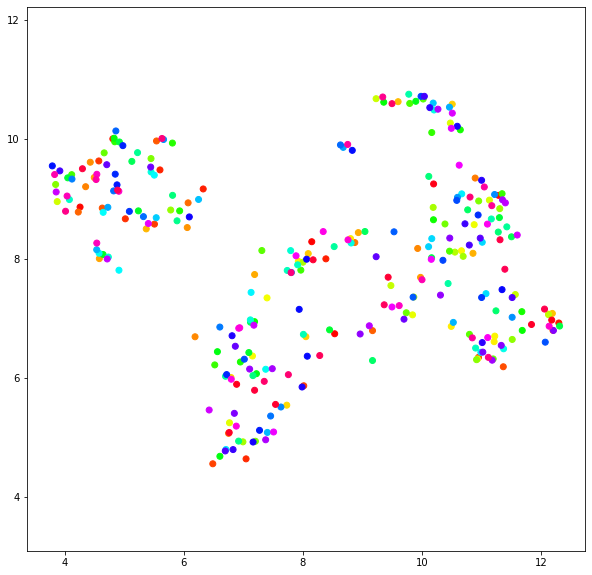

In [40]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[i for i in range(300)],
    cmap = 'hsv'
)
# plt.colorbar()
plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the Ubuiquant features', fontsize=24)

(300, 2)

In [23]:
scaled_featureDf[1:1000]

array([[ 0.77767161, -0.24300433,  2.24987168, ...,  0.68615419,
         1.2823813 , -0.72669959],
       [ 0.56171749,  1.33797653, -0.74627012, ...,  0.07728756,
         0.13997059, -0.05039971],
       [-1.7280508 ,  0.1218374 ,  1.51704065, ...,  0.16154525,
         1.00280429, -0.73434502],
       ...,
       [ 0.05960746, -0.97268795, -0.64590566, ..., -1.16409198,
        -2.43856865,  1.27936167],
       [ 0.40589554,  0.36506522, -0.14130563, ..., -1.20732295,
        -0.1747539 , -0.60517852],
       [ 0.54554972,  0.72990693, -0.76405992, ..., -1.37492764,
         1.27250979,  0.86284464]])

In [31]:
embedding2 = reducer.fit_transform(scaled_featureDf[1:10000])
embedding2.shape

(9999, 2)

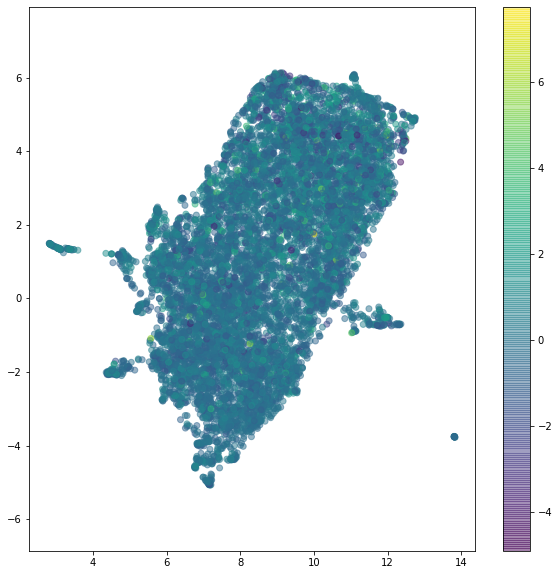

In [41]:
plt.scatter(
    embedding2[:, 0],
    embedding2[:, 1],
    c=allTarget[1:10000],
    alpha = 0.5
)
plt.colorbar()
plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the Ubuiquant dataset', fontsize=24)